## Multiclass Perceptron

Background: Assume	we	have	N	training	examples	{(x1,t1),...,(xN,tN)} where	tn can	
get	K discrete	values	{C1,	...,	CK},	i.e.	a	K-class	classification	problem. We	use	y_n" to	
represent	the	predicted	label	of	x_n"

Model: To	solve	a	K-class	classification	problem,	we	can	learn	K weight	vectors	
wk,	each	of	which	corresponding	to	one	of	the	classes.

Prediction: In	the	prediction	time,	a	data	point	x	will	be	classified	as	argmaxk wk * x

Training	Algorithm: We	train	the	multiclass	perceptron	based	on	the	following	
algorithm:

• Initialise	the	weight	vectors	randomly	w1,..,wK

• While	not	converged	do:

o For	n	=	1	to	N	do:
- y	=	argmaxk wk . xn
- If	yn !=	tn do:

• w_yn : = w_yn − η*x_n"

• w_tn : = w_tn + η*x_n"

Based on the background and how the multiclass perceptron work, the code below is how the multiclass perceptron is implemented:

### Import library and pre-process the dataset

Load Task1D_train.csv and Task1D_test.csv sets.

In [1]:
#Import important library for visualisation and reshape the dataset
library(ggplot2)
library(reshape2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
#Import the file and divide the dataset into label and dataset
options(warn=-1)
train_data <- read.csv("Task1D_train.csv")
test_data <- read.csv("Task1D_test.csv")

#Split the data
train_dat <- train_data[,-5]
train_lab <- train_data[,5]
test_dat <- test_data[,-5]
test_lab<- test_data[,5]

train.len <- nrow(train_data)
test.len <- nrow(test_data)

### Initialisation (Randomised the weight vector)

In the initialise process, the list of weight vector for each class will be created in order to store each weight vector after prediction. Also, the function for predict the misclassification process is created based on prediction formula explaining in the background information.

In [3]:
set.seed(60) #Set the number of ramdomise

#Identify how many class in the dataset
K<-unique(sort(train_lab)) #All class value
Phi <- as.matrix(cbind(1, train_dat)) # add a column of 1 as phi_0
eta <- 0.09 # Learning rate
epsilon <- 0.01 # Stoping criterion
tau.max <- 1000 # Maximum number of iterations
T <- train_lab  #Change for convenience

#Create a list so that it can initialise multiclass weight vector (In this case we got three classes)
weight_list <- list() #make a list so we can get a initial list for different weight vector for each class
for (k in 1:length(K)){
    weight_list[[k]] <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
    weight_list[[k]][1,] <- runif(ncol(Phi)) # Random initial values for weight vector for each class
}

#Prediction/error calculation function based on argmaxk wk*x 
error_cal <- function(x,weight,true_label,row){
    predictions <- data.frame(matrix(nrow = nrow(x), ncol = length(weight)))
    for (j in 1:length(weight)) {
        predictions[ , j] = x%*%weight[[j]][row,]
    }
    T <- as.integer(substr(true_label,2,length(true_label)))  #Change the class to integer so it is convenience for classification
    predict_res <- max.col(predictions) #argmaxk wk*x
    misclassi_per <- (sum(predict_res != T)/nrow(predictions))*100 #error is sum of the prediction value that not equal to t_n
    #divided by all prediction * 100
    return(misclassi_per)
}


error.trace <- matrix(,nrow=tau.max, ncol=1) # Placeholder for errors
error.trace[1] <- error_cal(Phi,weight_list,T,1) # record error for initial weights vector

### Multiclass Perceptron Algorithm

Implement	 the	multiclass	perceptron	as	explained	above.	Please	provide enough comments	for	your	code	in	your	submission.

In the multiclass perceptron, the sgd algorithm will be used for update weight.  The training algorithm will be using the same approach mentioned in the begining of the task. This is the implementation:

In [4]:
set.seed(60)
tau <- 1 # iteration counter 
terminate <- FALSE # termination status

#SGD for perceptron derived from Activity 3.1 from tutorial and some modification
while(!terminate){
    # Shuffle the data
    train_index <- sample(1:train.len, replace = FALSE)
    Phi <- Phi[train_index, ]
    T <- T[train_index]
    
    #For each number of iteration for each training point
    for (i in 1:train_index){
        #If the the number of iteration met the criteria, then it stop
        if (tau == tau.max) {break}
        
        predict_val <- c()
        
        #For each K-class, Predict the class whose weight vector produces the highest score
        for (k in 1:length(K)){
            #Calculate each prediction of the model
            predict_val[k] <- weight_list[[k]][tau,]%*%Phi[i,] #weight vector * x
        }
        
        #Predict value yn(argmaxk wk*x) 
        pred_value <- which.max(predict_val) #Identify which k-class weight vector produce highest :yn
        real_value <- which(K==T[i])#real value tn
        
        #If the predict value is not equal to real value
        if (pred_value!=real_value){
            #Increase iteration by 1
            tau = tau + 1
            #Update the weight
            for (k in 1:length(K)) {
                weight_list[[k]][tau,] <- weight_list[[k]][tau-1,] # update all W's with W-1
                }
            #Update the incorrect prediction based on these formula: w_pred = w_pred - eta*x and w_real = w_real + eta*x
            weight_list[[real_value]][tau,] <- weight_list[[real_value]][tau-1,] + eta*Phi[i,] #increase score of the right answer
            weight_list[[pred_value]][tau,] <- weight_list[[pred_value]][tau-1,]-eta*Phi[i,]#reduce score of wrong answer
            
            #Calculate the error
            error.trace[tau,] <- error_cal(Phi,weight_list,T,tau)
        }
    }
    #Decrease eta
    eta <- eta*0.99
    # recalculate termination conditions
    terminate <- (tau >= tau.max | (error.trace[tau, ] <= epsilon))
}
#cut the empty part of the matrix (when the loop stops before tau == tau.max)
weight<-list() 
for (i in 1:length(K)){
    weight[[i]] <- weight_list[[i]][1:tau,]
    }

#argmax k so we use this in the error prediction 
pred_value
weight[[1]] #all the weight vector in the argmax k that updated over the iteration

[1] 2

0.764436,0.35277531,0.6914292,0.69586957,0.2826156
0.674436,-0.21422469,0.3944292,0.15586957,0.0576156
0.764436,0.20877531,0.6824292,0.27286957,0.0756156
0.764436,0.20877531,0.6824292,0.27286957,0.0756156
0.764436,0.20877531,0.6824292,0.27286957,0.0756156
0.854436,0.66777531,0.9974292,0.39886957,0.0936156
0.764436,-0.02522469,0.7634292,-0.22213043,-0.1133844
0.764436,-0.02522469,0.7634292,-0.22213043,-0.1133844
0.764436,-0.02522469,0.7634292,-0.22213043,-0.1133844
0.764436,-0.02522469,0.7634292,-0.22213043,-0.1133844
0.764436,-0.02522469,0.7634292,-0.22213043,-0.1133844


### Plot the error vs the number of mini-batches

Set	 the	learning	rate	η	 to	.09,	and	train	 the	multiclass	perceptron	on	the provided training	data.After	processing	every	5 training	data	points	(also known	as	a mini-batch),	evaluate	 the	 error	 of	 the	 current	model	 on	 the  test	 data.	 Plot	 the	 error	 of the	 test	 data	 vs	 the	 number	 of	mini-batches,and include	it	in	your	Jupyter	Notebook	file	for	Question	6.	

Now, the error produce by the model from training set will be used for evaluate error of testing_set

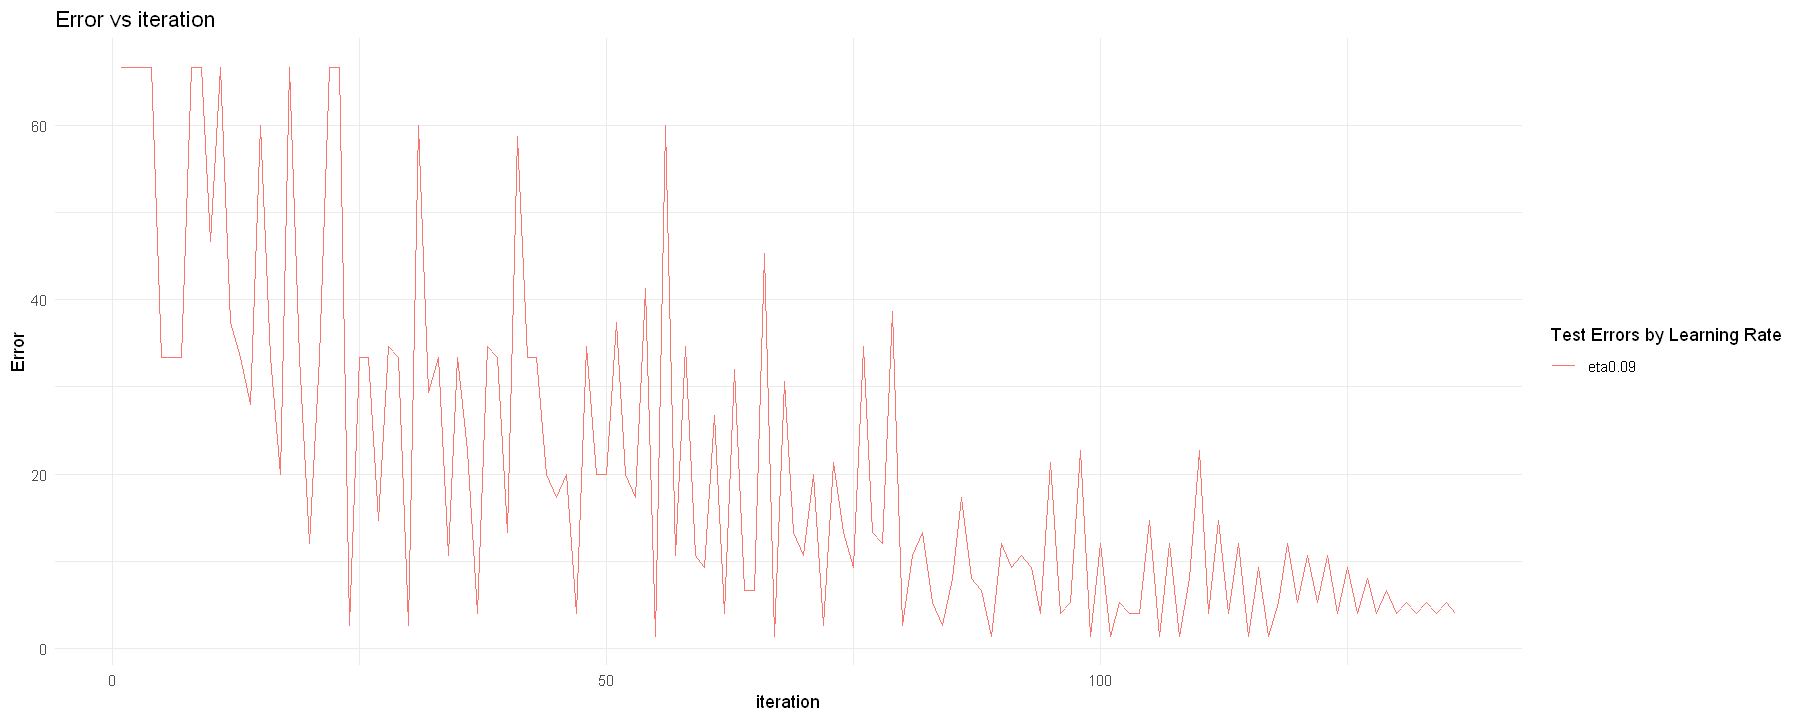

In [5]:
#Making phi-0 for test set
Phi_testset <- as.matrix(cbind(1, test_dat))
T <- test_lab # rename for simplicity
test_error <- data.frame() #dataframe for adding error rate 


#Iteration of all the test point by 5 data points (Evaluate the error based on the training of multi perceptron)
t=1 #counter 
for(j in seq(from=1, to =nrow(weight[[1]]), by = 5)){ #using weight[[1]] based on the argmax k 
    test_error[t,"eta0.09"] = error_cal(Phi_testset,weight,T,j)
    t=t+1
}
test_error[,"iteration"] <- as.numeric(rownames(test_error))
# reshaping for ggplot
error_test.m <- melt(test_error, id.vars = "iteration",value.name = "Error", variable.name = "Eta")
# adjusting plot size
options(repr.plot.width = 15, repr.plot.height = 6)
# plotting
ggplot(data = error_test.m, mapping = aes(x =iteration, y = Error, color = Eta)) + geom_line() +
    scale_color_discrete(guide = guide_legend(title = 'Test Errors by Learning Rate')) + theme_minimal()+ggtitle("Error vs iteration")

Based on the plot of error vs iteration, it seems that the error rate is decreased once the iteration of batch is increase for eta = 0.09. Also, the when the iteration is about 50, the error (convergence) is almost zero. 

## Reference

All of the code and the algorithm idea is derieved from background information and from the following:

- Chen, B. (2022). $\textit{Week 5.: Linear Models for Classification}$ \[PowerPoint slides]. https://lms.monash.edu/mod/resource/view.php?id=9894993
- Jupyter Notebooks:FIT5201 Machine Learning, (nd.). $\textit{Activity 3.1 Perceptron}$. 
https://lms.monash.edu/mod/folder/view.php?id=10133948